java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer \
-preload tokenize,ssplit,pos,lemma,ner,parse,depparse \
-status_port 9000 -port 9000 -timeout 15000 & 

In [1]:
import pandas as pd
import ast
from tqdm import tqdm
from nltk.tree import *
from IPython.display import Image

from sunburst_utils import *

In [2]:
df = pd.read_csv("../01_data/preprocessedData/random_train_question.csv")

In [3]:
first_level1_label=[]
first_level2_label=[]
first_level3_labels=[]
first_level3_leaves=[]

for tree_string in tqdm(df["question_parse_tree"]):
    tree = Tree.fromstring(tree_string)
    first_level1_label.append(tree.label())
    first_level2_label.append(tree[0].label())
    first_level3_labels.append(str(tuple([node.label() for node in tree[0]])))
    first_level3_leaves.append(str(tuple(tree[0][0].leaves())))
    
df["first_level1_label"] = first_level1_label
df["first_level2_label"] = first_level2_label
df["first_level3_labels"] = first_level3_labels
df["first_level3_leaves"] = first_level3_leaves

100%|██████████| 81971/81971 [00:07<00:00, 11199.88it/s]


In [4]:
levels = ['first_level3_leaves', 'first_level3_labels', 'first_level2_label'] # levels used for the hierarchical chart
color_columns = 'count'
value_column = 'count'

df_all_trees = build_hierarchical_dataframe(df, levels, value_column, color_columns)

In [5]:
df_all_trees.head()

,name,parent,value,color,id
1776,"('Are',)","('VBP', 'NP', 'ADJP', '.')#SQ",25,25,"('Are',)#('VBP', 'NP', 'ADJP', '.')#SQ"
1777,"('Are',)","('VBP', 'NP', 'PP', '.')#SQ",18,18,"('Are',)#('VBP', 'NP', 'PP', '.')#SQ"
1778,"('Are',)","('VBP', 'NP', 'VP', '.')#SQ",34,34,"('Are',)#('VBP', 'NP', 'VP', '.')#SQ"
2106,"('At', 'what')","('WHPP', 'SQ', '.')#SBARQ",18,18,"('At', 'what')#('WHPP', 'SQ', '.')#SBARQ"
2113,"('At', 'what', 'age')","('WHPP', 'SQ', '.')#SBARQ",19,19,"('At', 'what', 'age')#('WHPP', 'SQ', '.')#SBARQ"


In [6]:
import plotly.express as px
fig =px.sunburst(
    df_all_trees,
    names='name',
    ids='id',
    parents='parent',
    values='value',
    branchvalues='total',
    maxdepth=4,
)

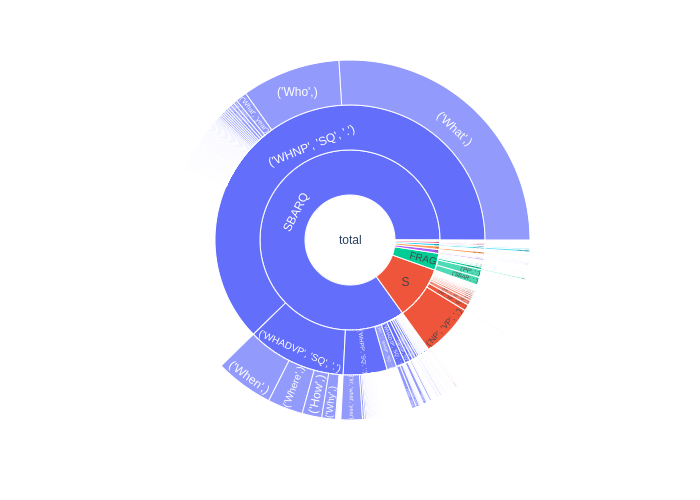

In [7]:
filename="images/questions/sunburst_constituency_tree.png"
fig.write_image(filename)
Image(filename)

In [8]:
import ast
import random

In [9]:
random.sample(list(df.loc[[ast.literal_eval(labels)[0] == "VBZ" for labels in df["first_level3_labels"]]]["question_text"]), 5)

['Has the joining brought about any changes in the region ?',
 'Is poultry available in various forms?',
 'Is the RICO Act still used today?',
 'Is it better to harvest grain before or after the morning dew evaporates?',
 'Is the output of a functional problem typically characterized by a simple or complex answer?']

In [10]:
df["first_level3_labels"][0][0]

'('

In [11]:
#SBARQ - (WHNP, SQ, .)
51075/len(df)

0.6230862134169401

In [12]:
#SBARQ - (WHADVP, SQ, .)
9740/len(df)

0.11882251040001952

In [13]:
#SBARQ - (WHPP, SQ, .)
4304/len(df)

0.052506374205511706

In [14]:
#S - (NP, VP, .)
5194/len(df)

0.06336387258908638